Using Historic_Crypto API ([David-Woroniuk/Historic_Crypto](https://github.com/David-Woroniuk/Historic_Crypto))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from Historic_Crypto import HistoricalData
import datetime 

tod = datetime.datetime.now()
d = datetime.timedelta(days = 100)
a = tod - d
# print(a.strftime("%Y-%m-%d-00-00"))
new = HistoricalData('ETH-USD',300, a.strftime("%Y-%m-%d-00-00")).retrieve_data()

print(new)

new.to_csv('eth_since_' + a.strftime("%Y%m%d") + '.csv', sep=',')





The first arguments for `HistoricalData` class is symbol/ticker information which you want to return (`str` type), second argument is granularity in seconds (60, 300, 900, 3600, 21600, 86400, `int` type), third argument is start date of the trade history in the format YYYY-MM-DD-HH-MM (`str` type), fourth argument is optional which is end date of the desired trade history in the format of YYYY-MM-DD-HH-MM (`str` type), its default value is now. 
<br>
After that, the record will save the data into a csv file.

Data since July 29, 2022

In [33]:
# stop pandas from using html output for table 
pd.set_option("display.notebook_repr_html", False)


# This is needed if you're using Jupyter to visualize charts:
%matplotlib inline
last100days = 'eth_since_20220729.csv'
data = pd.read_csv(last100days, index_col = 'time')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
data

                         low     high     open    close       volume
time                                                                
2022-07-29 00:05:00  1724.54  1726.83  1726.13  1725.69   427.256878
2022-07-29 00:10:00  1717.75  1726.12  1725.58  1720.65   626.614850
2022-07-29 00:15:00  1689.45  1720.89  1720.67  1699.02  5657.571089
2022-07-29 00:20:00  1696.42  1706.89  1698.96  1703.48  1965.359876
2022-07-29 00:25:00  1699.33  1705.85  1703.82  1699.94  1266.102777
...                      ...      ...      ...      ...          ...
2022-11-06 06:40:00  1615.29  1616.98  1616.85  1615.46   209.340523
2022-11-06 06:45:00  1614.46  1616.37  1615.54  1616.25   407.810987
2022-11-06 06:50:00  1616.28  1616.92  1616.35  1616.76   132.739697
2022-11-06 06:55:00  1616.04  1617.31  1616.76  1617.09   183.119694
2022-11-06 07:00:00  1616.63  1617.83  1617.10  1617.20   128.437408

[28883 rows x 5 columns]

Data since Jan 1, 2022

In [3]:
# This is needed if you're using Jupyter to visualize charts:
%matplotlib inline
since2022 = 'eth_since_20220101.csv'
data = pd.read_csv(since2022, index_col = 'time')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
data

,low,high,open,close,volume
time,,,,,
2022-01-01 00:05:00,3684.96,3705.64,3688.78,3696.76,951.396208
2022-01-01 00:10:00,3686.40,3698.33,3696.72,3691.29,1012.726630
2022-01-01 00:15:00,3683.96,3691.90,3691.25,3687.27,771.031043
2022-01-01 00:20:00,3686.88,3698.89,3687.27,3698.35,588.404706
2022-01-01 00:25:00,3694.00,3698.82,3698.82,3696.76,303.219324
...,...,...,...,...,...
2022-10-11 14:40:00,1283.92,1287.40,1284.26,1284.88,2188.453125
2022-10-11 14:45:00,1283.35,1286.24,1284.98,1284.60,2131.085450
2022-10-11 14:50:00,1283.25,1285.48,1284.44,1283.72,1778.952546


In [4]:
df = data.copy()
sma_span = 200
ema_span = 20
df['sma200'] = df['close'].rolling(sma_span).mean()
df['ema20'] = df['close'].ewm(span=ema_span).mean()
df.round(3)

,low,high,open,close,volume,sma200,ema20
time,,,,,,,
2022-01-01 00:05:00,3684.96,3705.64,3688.78,3696.76,951.396,NaN,3696.760
2022-01-01 00:10:00,3686.40,3698.33,3696.72,3691.29,1012.727,NaN,3693.888
2022-01-01 00:15:00,3683.96,3691.90,3691.25,3687.27,771.031,NaN,3691.458
2022-01-01 00:20:00,3686.88,3698.89,3687.27,3698.35,588.405,NaN,3693.448
2022-01-01 00:25:00,3694.00,3698.82,3698.82,3696.76,303.219,NaN,3694.249
...,...,...,...,...,...,...,...
2022-10-11 14:40:00,1283.92,1287.40,1284.26,1284.88,2188.453,1282.024,1281.600
2022-10-11 14:45:00,1283.35,1286.24,1284.98,1284.60,2131.085,1281.974,1281.886
2022-10-11 14:50:00,1283.25,1285.48,1284.44,1283.72,1778.953,1281.938,1282.061


In [5]:
df.dropna(inplace=True)
df.round(3)

,low,high,open,close,volume,sma200,ema20
time,,,,,,,
2022-01-01 16:40:00,3738.32,3744.09,3740.25,3741.59,172.434,3718.176,3730.749
2022-01-01 16:45:00,3732.41,3746.25,3741.74,3733.97,420.403,3718.362,3731.056
2022-01-01 16:50:00,3730.57,3738.97,3733.92,3731.71,397.460,3718.564,3731.118
2022-01-01 16:55:00,3725.81,3732.96,3730.79,3728.81,532.698,3718.772,3730.898
2022-01-01 17:00:00,3728.81,3736.47,3728.81,3734.38,228.033,3718.952,3731.230
...,...,...,...,...,...,...,...
2022-10-11 14:40:00,1283.92,1287.40,1284.26,1284.88,2188.453,1282.024,1281.600
2022-10-11 14:45:00,1283.35,1286.24,1284.98,1284.60,2131.085,1281.974,1281.886
2022-10-11 14:50:00,1283.25,1285.48,1284.44,1283.72,1778.953,1281.938,1282.061


In [6]:
def plot_system1(data):
    df = data.copy()
    dates = df.index
    price = df['close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.title("ETH-USD, EMA, SMA")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

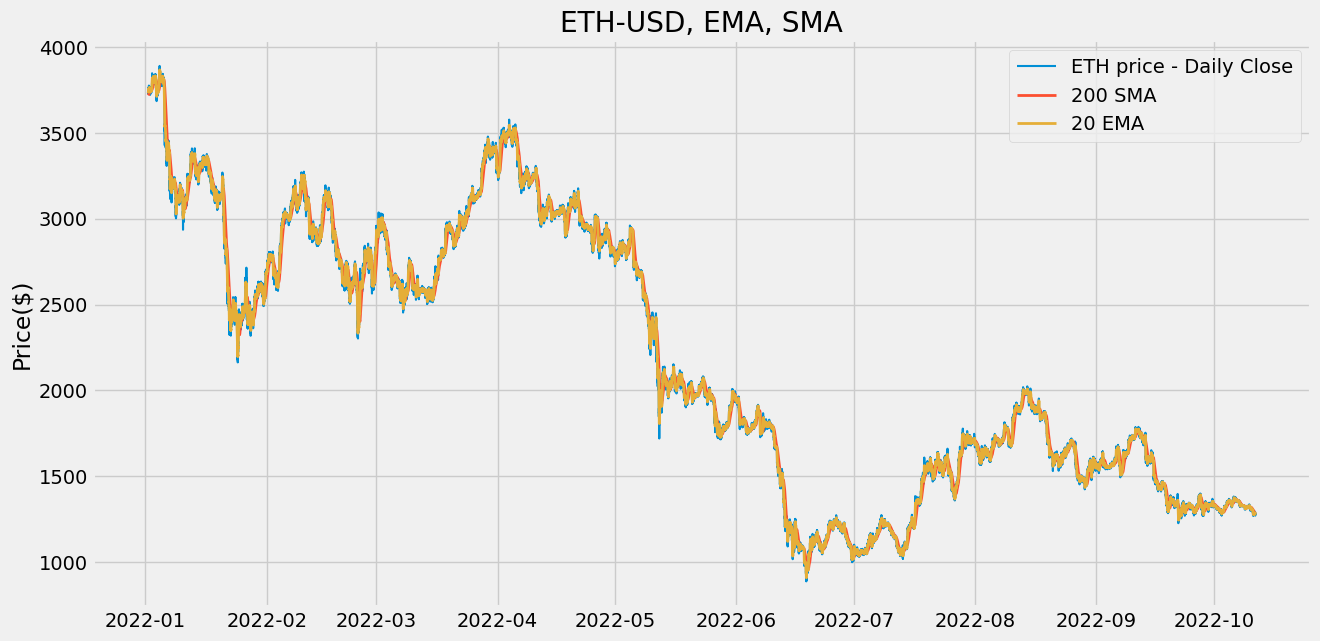

In [7]:
plot_system1(df)


In [7]:
# Our trading condition:
long_positions = np.where(df['ema20'] > df['sma200'], 1, 0)
df['Position'] = long_positions
df.round(3)

,low,high,open,close,volume,sma200,ema20,Position
time,,,,,,,,
2022-01-01 16:40:00,3738.32,3744.09,3740.25,3741.59,172.434,3718.176,3730.749,1
2022-01-01 16:45:00,3732.41,3746.25,3741.74,3733.97,420.403,3718.362,3731.056,1
2022-01-01 16:50:00,3730.57,3738.97,3733.92,3731.71,397.460,3718.564,3731.118,1
2022-01-01 16:55:00,3725.81,3732.96,3730.79,3728.81,532.698,3718.772,3730.898,1
2022-01-01 17:00:00,3728.81,3736.47,3728.81,3734.38,228.033,3718.952,3731.230,1
...,...,...,...,...,...,...,...,...
2022-10-11 14:40:00,1283.92,1287.40,1284.26,1284.88,2188.453,1282.024,1281.600,0
2022-10-11 14:45:00,1283.35,1286.24,1284.98,1284.60,2131.085,1281.974,1281.886,0
2022-10-11 14:50:00,1283.25,1285.48,1284.44,1283.72,1778.953,1281.938,1282.061,1


In [8]:
buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
df.loc[buy_signals].round(3)


,low,high,open,close,volume,sma200,ema20,Position
time,,,,,,,,
2022-01-02 09:50:00,3752.94,3760.55,3756.58,3753.34,103.169,3750.664,3750.687,1
2022-01-02 14:15:00,3752.15,3756.96,3753.14,3756.68,139.460,3749.455,3749.575,1
2022-01-02 14:35:00,3747.51,3757.05,3751.09,3755.18,173.270,3749.371,3749.858,1
2022-01-03 05:30:00,3806.79,3822.95,3806.91,3820.48,593.472,3798.256,3798.415,1
2022-01-03 08:05:00,3811.11,3818.14,3814.73,3811.56,105.225,3806.791,3806.925,1
...,...,...,...,...,...,...,...,...
2022-10-09 10:00:00,1316.46,1317.91,1317.45,1316.46,204.177,1316.403,1316.416,1
2022-10-10 00:40:00,1322.68,1328.02,1322.68,1326.65,1051.044,1321.932,1322.096,1
2022-10-10 04:45:00,1324.08,1325.20,1324.37,1324.81,425.603,1323.829,1323.867,1


In [9]:
buy_signals_prev = (df['Position'].shift(-1) == 1) & (df['Position'] == 0)
df.loc[buy_signals | buy_signals_prev].round(3)


,low,high,open,close,volume,sma200,ema20,Position
time,,,,,,,,
2022-01-02 09:45:00,3756.23,3761.78,3761.69,3756.58,118.031,3750.547,3750.407,0
2022-01-02 09:50:00,3752.94,3760.55,3756.58,3753.34,103.169,3750.664,3750.687,1
2022-01-02 14:10:00,3748.81,3754.24,3751.43,3753.14,259.738,3749.496,3748.827,0
2022-01-02 14:15:00,3752.15,3756.96,3753.14,3756.68,139.460,3749.455,3749.575,1
2022-01-02 14:30:00,3746.65,3752.07,3746.66,3751.02,117.841,3749.343,3749.298,0
...,...,...,...,...,...,...,...,...
2022-10-10 04:45:00,1324.08,1325.20,1324.37,1324.81,425.603,1323.829,1323.867,1
2022-10-11 12:20:00,1288.87,1291.03,1290.91,1289.87,1427.036,1285.410,1285.392,0
2022-10-11 12:25:00,1289.76,1292.70,1289.87,1292.10,1280.261,1285.323,1286.031,1


In [10]:
def plot_system1_sig(data):
    df = data.copy()
    dates = df.index
    price = df['close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

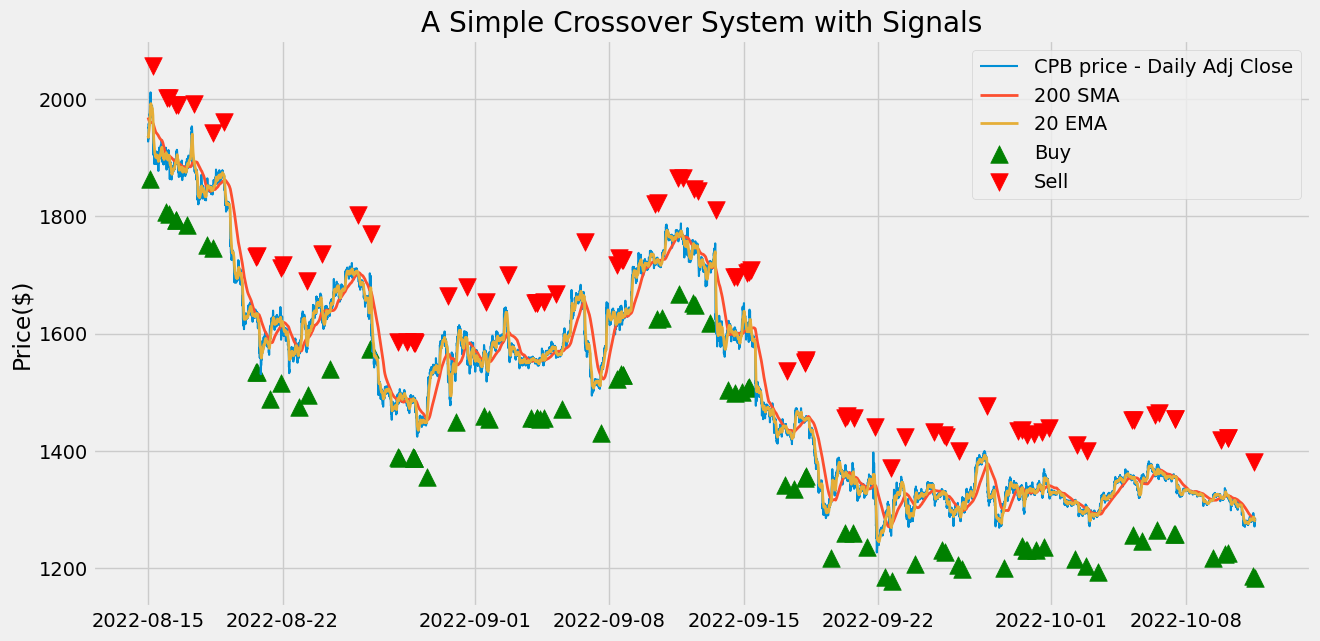

In [11]:
plot_system1_sig(df['2022-8-15':'2022-10-11'])


In [12]:
# The returns of the Buy and Hold strategy:
df['Hold'] = np.log(df['close'] / df['close'].shift(1))
# The returns of the Moving Average strategy:
df['Strategy'] = df['Position'].shift(1) * df['Hold']
# We need to get rid of the NaN generated in the first row:
df.dropna(inplace=True)
df

,low,high,open,close,volume,sma200,ema20,Position,Hold,Strategy
time,,,,,,,,,,
2022-01-01 16:45:00,3732.41,3746.25,3741.74,3733.97,420.403322,3718.36210,3731.055634,1,-0.002039,-0.002039
2022-01-01 16:50:00,3730.57,3738.97,3733.92,3731.71,397.459772,3718.56420,3731.117955,1,-0.000605,-0.000605
2022-01-01 16:55:00,3725.81,3732.96,3730.79,3728.81,532.697871,3718.77190,3730.898150,1,-0.000777,-0.000777
2022-01-01 17:00:00,3728.81,3736.47,3728.81,3734.38,228.033022,3718.95205,3731.229754,1,0.001493,0.001493
2022-01-01 17:05:00,3730.00,3737.29,3734.25,3732.68,206.905942,3719.13165,3731.367873,1,-0.000455,-0.000455
...,...,...,...,...,...,...,...,...,...,...
2022-10-11 14:40:00,1283.92,1287.40,1284.26,1284.88,2188.453125,1282.02425,1281.600153,0,0.000576,0.000000
2022-10-11 14:45:00,1283.35,1286.24,1284.98,1284.60,2131.085450,1281.97450,1281.885853,0,-0.000218,-0.000000
2022-10-11 14:50:00,1283.25,1285.48,1284.44,1283.72,1778.952546,1281.93795,1282.060533,1,-0.000685,-0.000000


In [13]:
returns = np.exp(df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")


Buy and hold return: -65.72%
Strategy return: -11.55%


In [14]:
n_days = len(df)
# Assuming 252 trading days in a year:
ann_returns = 252 / n_days * returns
print(f"Buy and hold annualized return: {round(ann_returns['Hold']*100,2)}%")
print(f"Strategy annualized return:{round(ann_returns['Strategy']*100,2)}%")

Buy and hold annualized return: -0.2%
Strategy annualized return:-0.04%


---

Binance API

In [15]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

import config
client = Client(config.apiKey, config.apiSecurity)

print('Logged in')

# info = client.get_recent_trades(symbol='BNBBTC')




Logged in


In [16]:
import datetime 
tod = datetime.datetime.now()
d = datetime.timedelta(days = 100)
a = tod - d
print(a.strftime("%Y%m%d"))
print(a.strftime("%d %b %Y"))


20221002
02 Oct 2022


In [17]:
def plot_systemETH(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter



In [18]:
def plot_system1_sig(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

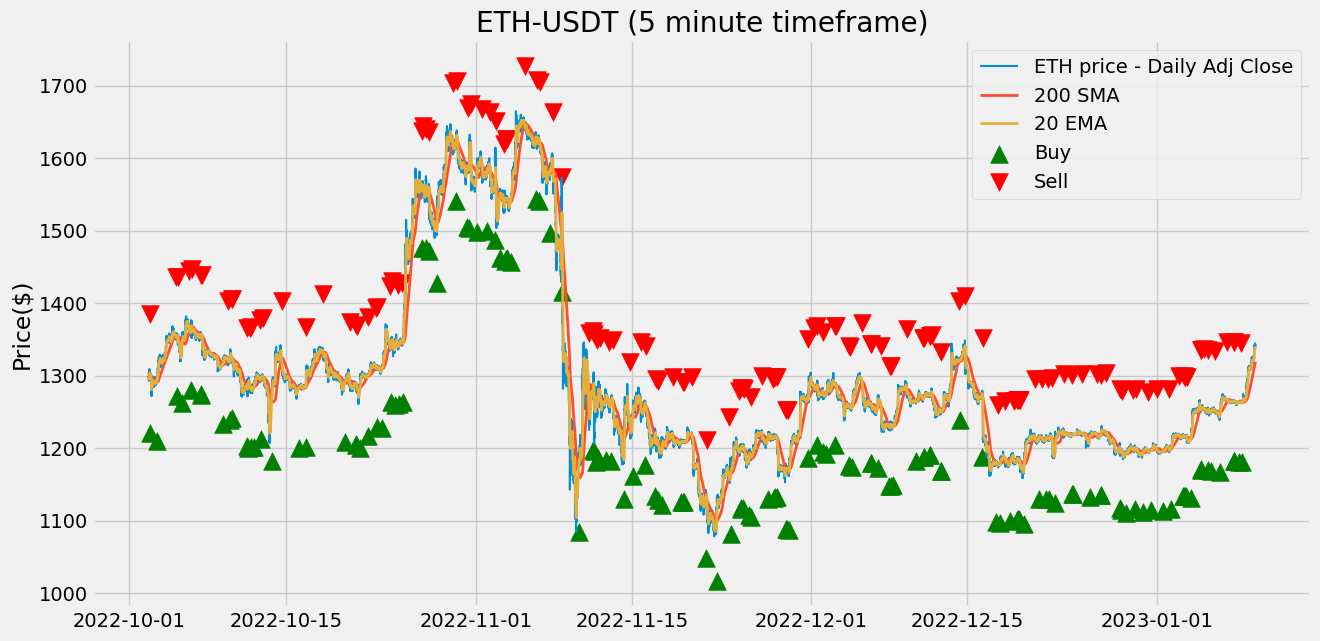

In [19]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_5MINUTE, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (5 minute timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (5 minute timeframe)')


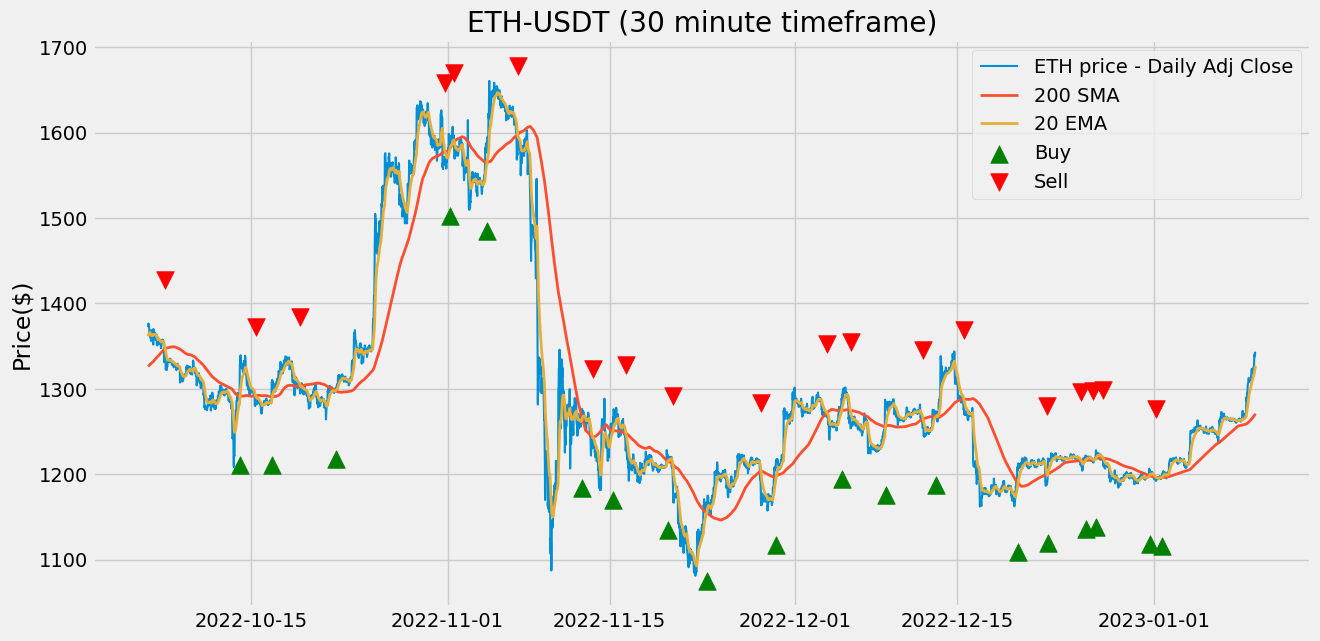

In [20]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_30MINUTE, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (30 minute timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (30 minute timeframe)')

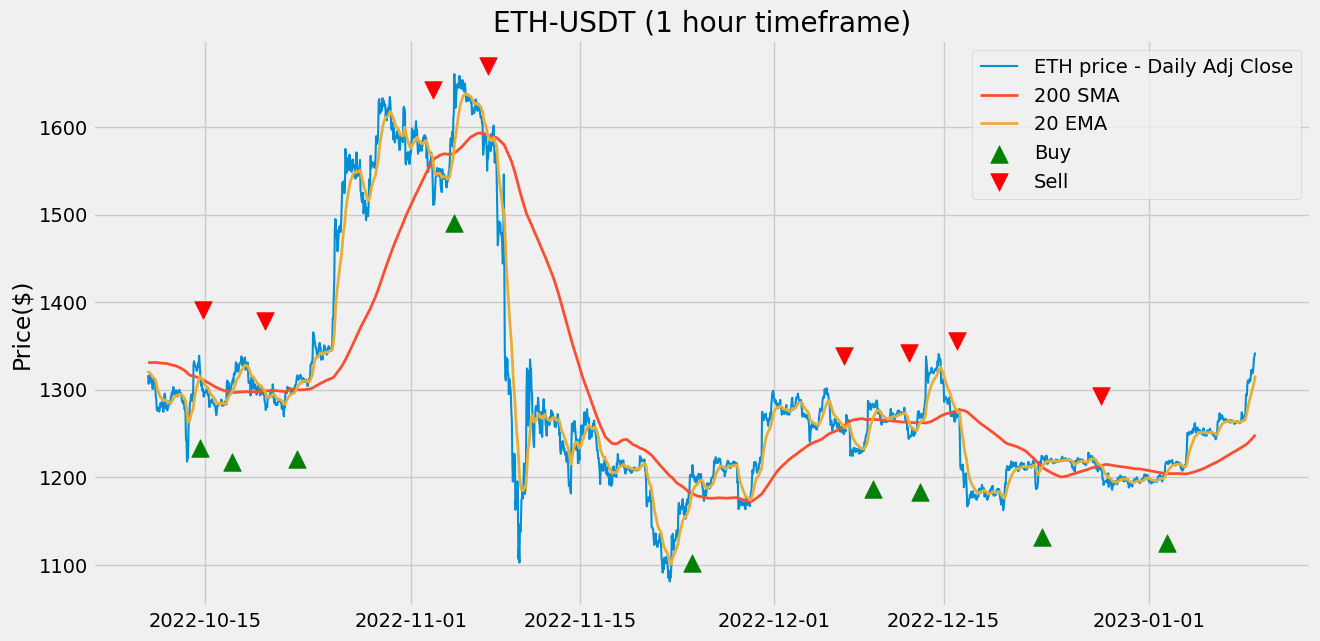

In [21]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (1 hour timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (1 hour timeframe)')

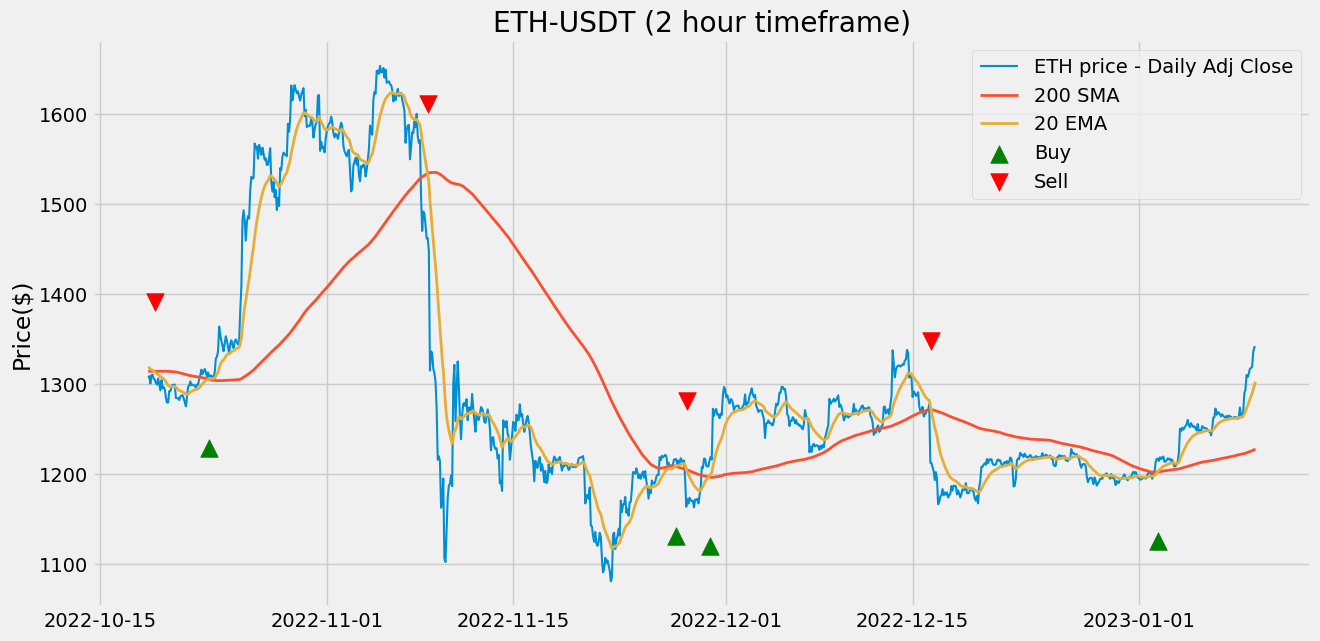

In [22]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_2HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

candles_df.index = pd.to_datetime(candles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df[numeric_column] = candles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df['sma200'] = candles_df['Close'].rolling(sma_span).mean()
candles_df['ema20'] = candles_df['Close'].ewm(span=ema_span).mean()
candles_df.round(3)
candles_df.dropna(inplace=True)
candles_df.round(3)
candles_df = candles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(candles_df, 'ETH-USDT (2 hour timeframe)')

# Our trading condition:
long_positions = np.where(candles_df['ema20'] > candles_df['sma200'], 1, 0)
candles_df['Position'] = long_positions
candles_df.round(3)

buy_signals = (candles_df['Position'] == 1) & (candles_df['Position'].shift(1) == 0)
candles_df.loc[buy_signals].round(3)

buy_signals_prev = (candles_df['Position'].shift(-1) == 1) & (candles_df['Position'] == 0)
candles_df.loc[buy_signals | buy_signals_prev].round(3)

plot_system1_sig(candles_df, 'ETH-USDT (2 hour timeframe)')

In [23]:
candles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_12HOUR, a.strftime("%d %b %Y"))
candles_df = pd.DataFrame(candles)
candles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'QUote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
candles_df_copy = candles_df.copy()
candles_df_copy.index = pd.to_datetime(candles_df_copy['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
candles_df_copy[numeric_column] = candles_df_copy[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
candles_df_copy['sma200'] = candles_df_copy['Close'].rolling(sma_span).mean()
candles_df_copy['ema20'] = candles_df_copy['Close'].ewm(span=ema_span).mean()
# candles_df_copy.round(3)
# candles_df_copy.dropna(inplace=True)
candles_df_copy.round(3)
candles_df_copy = candles_df_copy.drop(['Open Time', 'Close Time', 'QUote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

candles_df_copy
# plot_systemETH(candles_df_copy)


,Open,High,Low,Close,Volume,sma200,ema20
Open Time,,,,,,,
2022-10-02 00:00:00,1311.79,1317.93,1280.63,1297.87,170889.5708,NaN,1297.870000
2022-10-02 12:00:00,1297.87,1313.87,1270.00,1276.72,200850.4699,NaN,1286.766250
2022-10-03 00:00:00,1276.72,1301.94,1263.04,1299.01,203787.0290,NaN,1291.262082
2022-10-03 12:00:00,1299.02,1329.90,1294.44,1323.09,279988.2145,NaN,1300.450310
2022-10-04 00:00:00,1323.10,1359.67,1318.66,1349.74,234665.5608,NaN,1312.373066
...,...,...,...,...,...,...,...
2023-01-07 12:00:00,1263.79,1266.61,1261.30,1264.07,68558.5953,NaN,1235.830358
2023-01-08 00:00:00,1264.06,1266.22,1257.77,1261.67,60355.3489,NaN,1238.291276
2023-01-08 12:00:00,1261.68,1296.00,1261.27,1290.16,153281.4359,NaN,1243.231154


In [24]:
def plot_system1_sig(data, title):
    df = data.copy()
    dates = df.index
    price = df['Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    df['OpenTime'] = df.index
    df.loc[(df['Position'] == 1) & (df['Position'].shift(1) == 0), 'ep'] = df['Open']
    df.loc[(df['Position'] == 1) & (df['Position'].shift(1) == 0), 'date_time'] = df['OpenTime']
    df = df.fillna(method='ffill')


    df.loc[sell_signals, 'tp'] = df['Open'] - 10.00
    df.loc[sell_signals, 'sl'] = df['Open'] + 10.00
    df.loc[buy_signals, 'tp'] = df['Open'] + 10.00
    df.loc[buy_signals, 'sl'] = df['Open'] - 10.00
    df = df.fillna(method='ffill')

    df['outcome'] = ' '
    df.loc[(df['Position'] == 1) & (df['Close'] > df['tp']), 'outcome'] = 'WIN'
    df.loc[(df['Position'] == 1) & (df['Close'] < df['sl']), 'outcome'] = 'LOSS'
    df.loc[(df['Position'] == 0) & (df['Close'] < df['tp']), 'outcome'] = 'WIN'
    df.loc[(df['Position'] == 0) & (df['Close'] > df['sl']), 'outcome'] = 'LOSS'

    df.rename(columns= {'ot': 'Open Time'}, inplace=True)

    df2=df.reset_index()
    df2['ts'] = df2['Open Time'].astype('int64') // 10**9
    df2['outcome'] = df2['outcome'].replace(' ', np.nan)
    df2 = df2.dropna(subset=['outcome'])

    df3 = df2.groupby(['tp', 'outcome'], as_index=False)
    df3 = df3.first()
    df3['Open Time'] = pd.to_datetime(df3['ts'], unit='s')
    df3.set_index("Open Time", inplace = True)
    df3 = df2.groupby(['tp'], as_index=False)
    df3 = df3.first()
    df3.set_index("Open Time", inplace = True)
    df3 = df3.sort_index()

    df4 = df3.set_index('date_time')
    df4 = df4.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'sma200', 'ema20', 'OpenTime', 'ts'], axis=1)
    df4 = df4[['Position', 'ep', 'tp', 'sl', 'outcome']]
    df4.loc[df4['Position'] == 1, ['Position']] = 'Long'
    df4.loc[df4['Position'] == 0, ['Position']] = 'Short'


    df4.to_csv(title + datetime.datetime.now().strftime("%Y%m%d") + '.csv', sep=',')

    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='ETH price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.scatter(df3.index, df3['tp'], marker='*', color="black", s=160)
        plt.title(title)
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

2 hour timeframe is chose.

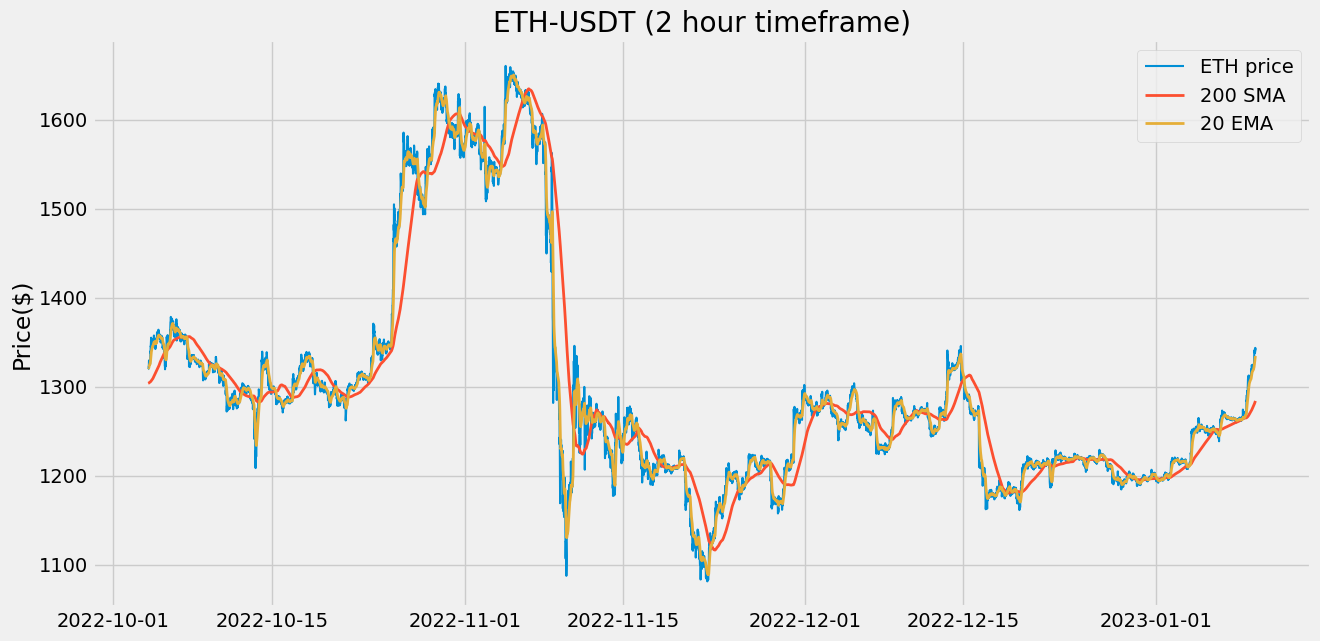

In [25]:
hourlycandles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_15MINUTE, a.strftime("%d %b %Y"))
hourlycandles_df = pd.DataFrame(hourlycandles)
hourlycandles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

hourlycandles_df.index = pd.to_datetime(hourlycandles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
hourlycandles_df[numeric_column] = hourlycandles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
hourlycandles_df['sma200'] = hourlycandles_df['Close'].rolling(sma_span).mean()
hourlycandles_df['ema20'] = hourlycandles_df['Close'].ewm(span=ema_span).mean()
hourlycandles_df.round(3)
hourlycandles_df.dropna(inplace=True)
hourlycandles_df.round(3)
hourlycandles_df = hourlycandles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

plot_systemETH(hourlycandles_df, 'ETH-USDT (2 hour timeframe)')

In [26]:
hourlycandles_df

,Open,High,Low,Close,Volume,sma200,ema20
Open Time,,,,,,,
2022-10-04 01:45:00,1321.94,1322.60,1319.45,1319.48,2056.2711,1303.78415,1321.322028
2022-10-04 02:00:00,1319.48,1320.96,1318.66,1319.59,2049.9480,1303.82380,1321.157073
2022-10-04 02:15:00,1319.59,1320.85,1319.09,1319.93,2061.4922,1303.86265,1321.040209
2022-10-04 02:30:00,1319.93,1321.89,1319.78,1320.87,1443.7182,1303.90120,1321.023998
2022-10-04 02:45:00,1320.87,1322.45,1319.71,1321.37,1721.7416,1303.95530,1321.056951
...,...,...,...,...,...,...,...
2023-01-09 17:15:00,1340.26,1344.51,1339.53,1342.57,6448.9648,1282.39515,1331.111338
2023-01-09 17:30:00,1342.57,1342.57,1338.16,1338.54,2978.6653,1282.76755,1331.818830
2023-01-09 17:45:00,1338.54,1342.58,1337.35,1341.56,2614.6026,1283.15000,1332.746560


In [27]:
hourlycandles = client.get_historical_klines('ETHUSDT', Client.KLINE_INTERVAL_1HOUR, a.strftime("%d %b %Y"))
hourlycandles_df = pd.DataFrame(hourlycandles)
hourlycandles_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

hourlycandles_df.index = pd.to_datetime(hourlycandles_df['Open Time'], unit='ms')

numeric_column = ['Open', 'High', 'Low', 'Close', 'Volume']
hourlycandles_df[numeric_column] = hourlycandles_df[numeric_column].apply(pd.to_numeric, axis=1)

sma_span = 200
ema_span = 20
hourlycandles_df['sma200'] = hourlycandles_df['Close'].rolling(sma_span).mean()
hourlycandles_df['ema20'] = hourlycandles_df['Close'].ewm(span=ema_span).mean()
hourlycandles_df.round(3)
hourlycandles_df.dropna(inplace=True)
hourlycandles_df.round(3)
hourlycandles_df = hourlycandles_df.drop(['Open Time', 'Close Time', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'Ignore', 'Number of Trades'], axis=1)

# plot_systemETH(hourlycandles_df, 'ETH-USDT (2 hour timeframe)')

# identify long and short position
long_positions = np.where(hourlycandles_df['ema20'] > hourlycandles_df['sma200'], 1, 0)
hourlycandles_df['Position'] = long_positions
hourlycandles_df.round(3)

# set the entry point and entry time ('ep', 'date_time') for buy and sell
hourlycandles_df['OpenTime'] = hourlycandles_df.index
buy_signals = (hourlycandles_df['Position'] == 1) & (hourlycandles_df['Position'].shift(1) == 0) # when position is 0 and the next row (-ve means after) is postion 1
sell_signals = (hourlycandles_df['Position'] == 0) & (hourlycandles_df['Position'].shift(1) == 1)
hourlycandles_df.loc[(buy_signals | sell_signals), 'ep'] = hourlycandles_df['Open']
hourlycandles_df.loc[(buy_signals | sell_signals), 'date_time'] = hourlycandles_df['OpenTime']

# fill the empty cell with value from previous row
hourlycandles_df = hourlycandles_df.fillna(method='ffill')

# set tp and sl of sell to 1000 pips below and above 
hourlycandles_df.loc[sell_signals, 'tp'] = hourlycandles_df['Open'] - 10.00
hourlycandles_df.loc[sell_signals, 'sl'] = hourlycandles_df['Open'] + 10.00
# set tp and sl of buy to 1000 pips above and below 
hourlycandles_df.loc[buy_signals, 'tp'] = hourlycandles_df['Open'] + 10.00
hourlycandles_df.loc[buy_signals, 'sl'] = hourlycandles_df['Open'] - 10.00

# fill the empty cell with value from previous row
hourlycandles_df = hourlycandles_df.fillna(method='ffill')

# identify the winning and lossing trade
hourlycandles_df['outcome'] = ' '
hourlycandles_df.loc[(hourlycandles_df['Position'] == 1) & (hourlycandles_df['Close'] > hourlycandles_df['tp']), 'outcome'] = 'WIN'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 1) & (hourlycandles_df['Close'] < hourlycandles_df['sl']), 'outcome'] = 'LOSS'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 0) & (hourlycandles_df['Close'] < hourlycandles_df['tp']), 'outcome'] = 'WIN'
hourlycandles_df.loc[(hourlycandles_df['Position'] == 0) & (hourlycandles_df['Close'] > hourlycandles_df['sl']), 'outcome'] = 'LOSS'

# get a new empty column to store index value 'Open Time'
# hourlycandles_df.rename(columns= {'ot': 'Open Time'}, inplace=True)

# reset index 
df2=hourlycandles_df.reset_index()

# create a new column 'ts' (stand for timestamp) to store the time. Neede to convert to timestamp format because the year, month, date type format will be excluded after we regroup in the future step
df2['ts'] = df2['Open Time'].astype('int64') // 10**9

# # drop the empty cell, by replace the empty with NaN then using dropna function
df2['outcome'] = df2['outcome'].replace(' ', np.nan)
df2 = df2.dropna(subset=['outcome'])

# # group by 'tp' and get first outcome of the buy/sell 
df3 = df2.groupby(['tp'], as_index=False)
df3 = df3.first()

# when grouped, 'Open Time' column will disolve. So I create a new column 'Open Time', the reference to column 'ts' and convert to year, month, date format
df3['Open Time'] = pd.to_datetime(df3['ts'], unit='s')
df3.set_index("date_time", inplace = True)
df3 = df3.sort_index()

# rename column, drop unuse column and sort the column according to given order
df3.rename(columns= {'Open Time': 'Exit Time'}, inplace=True)
df3 = df3[['Position', 'ep', 'tp', 'sl', 'outcome', 'Exit Time', 'Close']]

# at column 'position' change the value of 1 to long and 0 to short
df3.loc[df3['Position'] == 1, ['Position']] = 'Long'
df3.loc[df3['Position'] == 0, ['Position']] = 'Short'
df3


,Position,ep,tp,sl,outcome,Exit Time,Close
date_time,,,,,,,
2022-10-14 13:00:00,Long,1338.74,1348.74,1328.74,LOSS,2022-10-14 14:00:00,1320.30
2022-10-14 19:00:00,Short,1300.21,1290.21,1310.21,WIN,2022-10-15 08:00:00,1280.47
2022-10-17 05:00:00,Long,1305.05,1315.05,1295.05,WIN,2022-10-17 09:00:00,1317.98
2022-10-19 22:00:00,Short,1294.33,1284.33,1304.33,WIN,2022-10-20 00:00:00,1276.85
2022-10-22 14:00:00,Long,1310.29,1320.29,1300.29,WIN,2022-10-23 17:00:00,1328.69
2022-11-02 20:00:00,Short,1535.93,1525.93,1545.93,WIN,2022-11-02 20:00:00,1511.27
2022-11-04 13:00:00,Long,1609.72,1619.72,1599.72,WIN,2022-11-04 14:00:00,1660.45
2022-11-07 09:00:00,Short,1568.08,1558.08,1578.08,LOSS,2022-11-07 10:00:00,1578.54
2022-11-24 06:00:00,Long,1200.88,1210.88,1190.88,WIN,2022-11-24 06:00:00,1214.01


Strategy returns

In [28]:
# The returns of the Buy and Hold strategy:
hourlycandles_df['Hold'] = np.log(hourlycandles_df['Close'] / hourlycandles_df['Close'].shift(1))
# The returns of the Moving Average strategy:
hourlycandles_df['Strategy'] = hourlycandles_df['Position'].shift(1) * hourlycandles_df['Hold']
# We need to get rid of the NaN generated in the first row:
hourlycandles_df.dropna(inplace=True)
hourlycandles_df

,Open,High,Low,Close,Volume,sma200,ema20,Position,OpenTime,ep,date_time,tp,sl,outcome,Hold,Strategy
Open Time,,,,,,,,,,,,,,,,
2022-10-14 13:00:00,1338.74,1339.23,1328.01,1330.83,41654.2668,1313.24075,1314.776713,1,2022-10-14 13:00:00,1338.74,2022-10-14 13:00:00,1348.74,1328.74,,-0.005926,-0.000000
2022-10-14 14:00:00,1330.83,1330.91,1310.63,1320.30,70222.4264,1313.02375,1315.302740,1,2022-10-14 14:00:00,1338.74,2022-10-14 13:00:00,1348.74,1328.74,LOSS,-0.007944,-0.007944
2022-10-14 15:00:00,1320.31,1324.50,1305.89,1310.04,37360.9512,1312.73215,1314.801527,1,2022-10-14 15:00:00,1338.74,2022-10-14 13:00:00,1348.74,1328.74,LOSS,-0.007801,-0.007801
2022-10-14 16:00:00,1310.04,1313.22,1298.00,1304.63,39676.5732,1312.45700,1313.832810,1,2022-10-14 16:00:00,1338.74,2022-10-14 13:00:00,1348.74,1328.74,LOSS,-0.004138,-0.004138
2022-10-14 17:00:00,1304.63,1309.25,1300.62,1308.62,18059.8239,1312.22015,1313.336352,1,2022-10-14 17:00:00,1338.74,2022-10-14 13:00:00,1348.74,1328.74,LOSS,0.003054,0.003054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-09 14:00:00,1319.58,1331.42,1316.21,1326.06,30959.2230,1245.73965,1304.777217,1,2023-01-09 14:00:00,1217.18,2023-01-02 10:00:00,1227.18,1207.18,WIN,0.004906,0.004906
2023-01-09 15:00:00,1326.05,1341.86,1323.19,1335.68,48879.9713,1246.44275,1307.720340,1,2023-01-09 15:00:00,1217.18,2023-01-02 10:00:00,1227.18,1207.18,WIN,0.007228,0.007228
2023-01-09 16:00:00,1335.69,1344.89,1335.68,1337.90,36174.9204,1247.16085,1310.594593,1,2023-01-09 16:00:00,1217.18,2023-01-02 10:00:00,1227.18,1207.18,WIN,0.001661,0.001661


In [29]:
returns = np.exp(hourlycandles_df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")


Buy and hold return: 0.13%
Strategy return: 15.83%


In [30]:
n_days = len(hourlycandles_df)
# Assuming 252 trading days in a year:
ann_returns = 252 / n_days * returns
print(f"Buy and hold annualized return: {round(ann_returns['Hold']*100,2)}%")
print(f"Strategy annualized return:{round(ann_returns['Strategy']*100,2)}%")

Buy and hold annualized return: 0.02%
Strategy annualized return:1.9%
